<div><img src="https://www.ibm.com/blogs/bluemix/wp-content/uploads/2017/02/NLU.png", width=170, height=170, align = 'right'> 
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/51/IBM_logo.svg/640px-IBM_logo.svg.png", width = 90, height = 90, align = 'right', style="margin:0px 25px"></div>

# 基于基站定位数据的商圈分析（案例）
本文演示基于无线基站数据的分析来分类基站附近人流特征和规律,划分不同的商圈以进行相应的商业活动。（文中所用为模拟数据）<br>
This notebook runs on Python 3.5 with Spark 2.1.
___________

## 内容列表
1.  [实现目标](#buss_circle_1)<br>
2.  [数据预处理](#buss_circle_2)<br>
3.  [构建模型](#buss_circle_3) <br>
 3.1.  [谱系聚类图](#buss_circle_3_1) <br>
 3.2.  [模型验证](#buss_circle_3_2) <br>
 3.3.  [模型验证](#buss_circle_3_3) <br>
 3.4.  [模型聚类结果分析](#buss_circle_3_4) <br>

 <a id="buss_circle_1"></a>
### 1. 实现目标
- 利用基站数据进行基站覆盖范围的商圈分类
- 分析不同商圈的人群特征和规律统计出基站覆盖区域的特点,以选择合适的促销等商业活动

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering #导入sklearn的层次聚类函数
from sklearn.cluster import KMeans
from io import StringIO
import requests
import json
from scipy.cluster.hierarchy import linkage,dendrogram
import seaborn as sns

In [14]:
# The code was removed by DSX for sharing.

,基站编号,工作日上班时间人均停留时间,凌晨人均停留时间,周末人均停留时间,日均人流量
0,36902,78,521,602,2863
1,36903,144,600,521,2245
2,36904,95,457,468,1283
3,36905,69,596,695,1054
4,36906,190,527,691,2051


 <a id="buss_circle_2"></a>
### 2. 数据预处理
由于各个属性间差异较大,为了消除数量级数据带来的影响,在进行聚类前需要进行**离差标准化处理**<br>

In [15]:
data_cp = data.copy()
data_cp = (data_cp - data_cp.min())/(data_cp.max() - data_cp.min()) #离差标准化
data_cp.set_index(data.基站编号,inplace=True)
data_cp.drop(['基站编号'],inplace=True,axis=1)
#data_cp = data_cp.reset_index()
data_cp.head()


,工作日上班时间人均停留时间,凌晨人均停留时间,周末人均停留时间,日均人流量
基站编号,,,,
36902,0.103865,0.856364,0.850539,0.169153
36903,0.263285,1.000000,0.725732,0.118210
36904,0.144928,0.740000,0.644068,0.038909
36905,0.082126,0.992727,0.993837,0.020031
36906,0.374396,0.867273,0.987673,0.102217


 <a id="buss_circle_3"></a>
### 3. 构建模型
 <a id="buss_circle_3_1"></a>
#### 3.1 层次聚类谱系聚类图
- 从图中可以看出数据分为三类

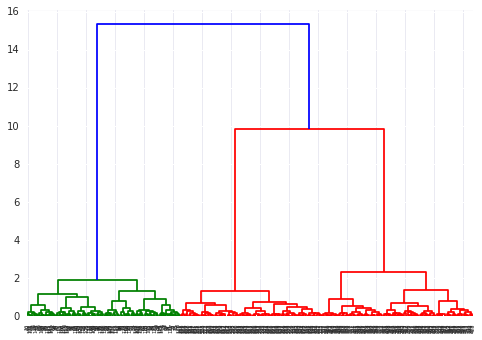

In [16]:
Z = linkage(data_cp, method = 'ward', metric = 'euclidean') #谱系聚类图
P = dendrogram(Z, 0) #画谱系聚类图
plt.show()

 <a id="buss_circle_3_2"></a>
#### 3.2 模型构建
##### 调用sklearn的层次聚类算法AgglomerativeClustering生成聚类模型

In [18]:
k = 3 #聚类数
model = AgglomerativeClustering(n_clusters = k, linkage = 'ward')
model.fit(data_cp) #训练模型
print(model.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


 <a id="buss_circle_3_3"></a>
#### 3.3 聚类结果拟合训练数据

In [19]:

#详细输出原始数据及其类别
r = pd.concat([data_cp, pd.Series(model.labels_, index = data_cp.index)], axis = 1)  #详细输出每个样本对应的类别
r.columns = list(data_cp.columns) + [u'聚类类别'] #重命名表头
r.head(5)

,工作日上班时间人均停留时间,凌晨人均停留时间,周末人均停留时间,日均人流量,聚类类别
基站编号,,,,,
36902,0.103865,0.856364,0.850539,0.169153,1
36903,0.263285,1.000000,0.725732,0.118210,1
36904,0.144928,0.740000,0.644068,0.038909,1
36905,0.082126,0.992727,0.993837,0.020031,1
36906,0.374396,0.867273,0.987673,0.102217,1


 <a id="buss_circle_3_4"></a>
#### 3.4 模型聚类结果分析

- TYPE1: 可以看出日均人流量较大,但白天凌晨以及周末的停留时间都短,该基站覆盖区域类似于商业区.
- TYPE2: 凌晨和周末的停留时间较长,上班时间较短,该基站覆盖区域类似于住宅区.
- TYPE3: 工作时间停留较长,凌晨以及周末停留时间较短,该基站覆盖区域类似于工作区.

TYPE2人流量少,TYPE3的人流量都较一般,工作区域也不利于营销活动,这两类商圈都不利于运营商促销活动的开展.而TYPE1的人流量大,商业区有利于进行运行商的促销活动

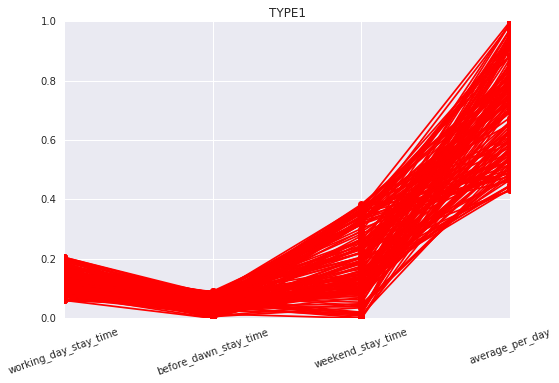

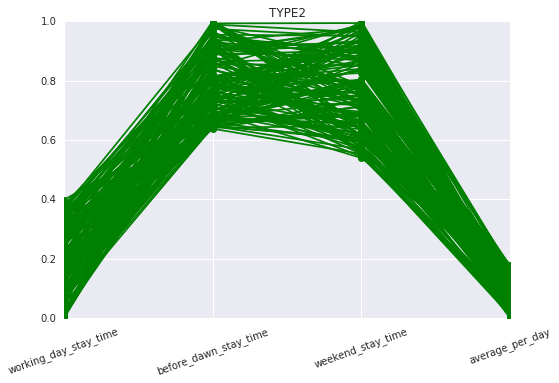

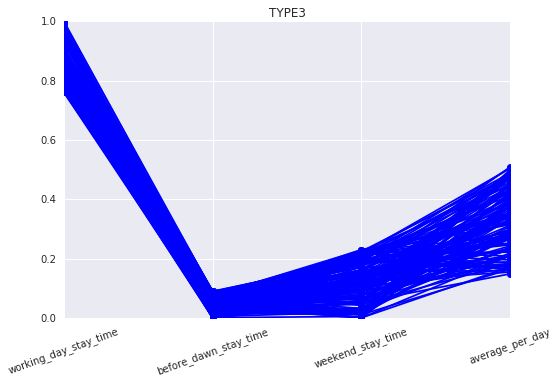

In [20]:
#plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
#plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

style = ['ro-', 'go-', 'bo-']
xlabels = [u'working_day_stay_time', u'before_dawn_stay_time', u'weekend_stay_time', u'average_per_day']

for i in range(k): #逐一作图，作出不同样式
  plt.figure()
  tmp = r[r[u'聚类类别'] == i].iloc[:,:4] #提取每一类
  for j in range(len(tmp)):
    plt.plot(range(1, 5), tmp.iloc[j], style[i])
  plt.xticks(range(1, 5), xlabels, rotation = 20) #坐标标签
  plt.title(u'TYPE%s' %(i+1)) #我们计数习惯从1开始
  plt.subplots_adjust(bottom=0.15) #调整底部
  #plt.savefig(u'%s%s.png' %(pic_output, i+1)) #保存图片
plt.show()

### 4. 针对TYPE1(商业区)进行分析

In [21]:
data['聚类类别'] = model.labels_
data_type1 = data[data.聚类类别 == 1]
data_type1.head(5)

,基站编号,工作日上班时间人均停留时间,凌晨人均停留时间,周末人均停留时间,日均人流量,聚类类别
0,36902,78,521,602,2863,1
1,36903,144,600,521,2245,1
2,36904,95,457,468,1283,1
3,36905,69,596,695,1054,1
4,36906,190,527,691,2051,1


***
### 作者
**颜 晓超** 是在IBM从事数据分析的高级分析师，有丰富的针对企业客户开发和提供各类数据分析服务经验

<div><br><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/51/IBM_logo.svg/640px-IBM_logo.svg.png" width = 200 height = 200>
</div><br>